In [108]:
# Flowing this 
# https://www.youtube.com/watch?v=nMwjgCchTJc

In [109]:
using MLDatasets, Flux, Plots,  Statistics

In [110]:
using Images

In [111]:
train_x, train_y = MNIST.traindata(Float32)


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [112]:
test_x, test_y = MNIST.testdata(Float32)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [113]:
size(train_x)

(28, 28, 60000)

6


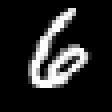

In [114]:
# l = @layout
# plots = 
# l = @layout [1;5]
# a = []
# for i in 1:5

idx = 14
x1 = train_x[:,:,idx];
y1 = train_y[idx]
println(y1)
colorview(Gray, x1', )

#     # heatmap(x1, c = :greys, title = y1)
#     push!(a, colorview(Gray, x1'))
# end
# # apply(plot,a)

# plot(a[1],a[2], layout = l)

In [115]:
xtrain = Flux.flatten(train_x);
xtest = Flux.flatten(test_x);
size(xtrain)

(784, 60000)

* To type a greek char. Do it like in Word. 
* \sigma then hit tab

In [116]:
# ytrain, ytest = Flux.onehotbatch(train_y, 0:9)
ytrain, ytest = [Flux.onehotbatch(a, 0:9) for a in [train_y, test_y]]

2-element Vector{Flux.OneHotArray{UInt32, 10, 1, 2, Vector{UInt32}}}:
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]

In [117]:
# [println("$s and #n") for ]

In [118]:
# t = [(a*b) for  a = 0:5,  b =-5:3] 

In [119]:
(m, n, x)  = size(train_x)

(28, 28, 60000)

In [120]:
?Flux.σ

```
σ(x) = 1 / (1 + exp(-x))
```

Classic [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation function. Unicode `σ` can be entered as `\sigma` then tab, in many editors. The ascii name `sigmoid` is also exported.

See also [`sigmoid_fast`](@ref).

```
julia> using UnicodePlots

julia> lineplot(sigmoid, -5, 5, height=7)
          ┌────────────────────────────────────────┐     
        1 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⣀⡠⠤⠖⠒⠒⠋⠉⠉⠉⠉⠉⠉│ σ(x)
          │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⢀⡠⠖⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│     
          │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⣀⠔⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│     
   f(x)   │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡠⡏⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│     
          │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡔⠋⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│     
          │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⠤⠊⠁⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│     
        0 │⣀⣀⣀⣀⣀⣀⣀⠤⠤⠤⠒⠊⠉⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│     
          └────────────────────────────────────────┘     
          ⠀-5⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀5⠀     
          ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀x⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀     

julia> sigmoid === σ
true
```


In [121]:
function make_model()
    h = 60
    in_dims, out_dims = m*n, 10
    model = Flux.Chain(
        Dense(in_dims, h, Flux.σ), 
        Dense(h,h, Flux.σ),
        Dense(h, out_dims, Flux.σ)

    )
    return model
end
model = make_model()

Chain(
  Dense(784, 60, σ),                    # 47_100 parameters
  Dense(60, 60, σ),                     # 3_660 parameters
  Dense(60, 10, σ),                     # 610 parameters
)                   # Total: 6 arrays, 51_370 parameters, 201.039 KiB.

In [122]:
loss(x,y) = Flux.Losses.mse(model(x), y)

loss (generic function with 1 method)

In [123]:
# ?Flux.onecold

In [124]:
# Don't need the statisics dot notation. Just helsp to know where it comes from. 
accuracy(x,y) = Statistics.mean(Flux.onecold(model(x)) .==Flux.onecold(y)) 

accuracy (generic function with 1 method)

In [125]:
opt = Descent(0.23)
# opt = Flux.ADAM(0.23)

Descent(0.23)

In [126]:
data = [(xtrain, ytrain)];

In [127]:
parameters = Flux.params(model);

In [128]:
function say_status(xtrain, ytrain, state)
println("$state loss = $(loss(xtrain, ytrain))")
println("$state accuracy = $(accuracy(xtrain, ytrain))\n")
end

say_status (generic function with 1 method)

In [129]:
say_status(xtrain, ytrain, "Old")

Old loss = 0.3207975
Old accuracy = 0.09321666666666667



Random accuracy is about 0.1 which makes since. 10% of the time you would guesss the correct number out of 10

In [130]:
Flux.train!(loss, parameters, data, opt)

In [131]:
say_status(xtrain, ytrain, "New")

New loss = 0.30246505
New accuracy = 0.09385



# SGD
* previously we used all the data. 
* Now grab a subset, calc the gradient, step to update the weights, and repeat ...

In [132]:
# function SGD_Mnist(xtrain, ytrain, opt, epochs_max = 100_000)
grad_opt = Descent(0.23)

vector_length, num_imgs = size(xtrain)

# Make a new model so that we are staring from scratch
model = make_model()
loss(x,y) = Flux.Losses.mse(model(x), y)
accuracy(x,y) = Statistics.mean(Flux.onecold(model(x)) .==Flux.onecold(y)) 
parameters = Flux.params(model);
#     opt = 

function say_status_V2(xtrain, ytrain, state)
    println("$state loss = $(loss(xtrain, ytrain)) and accuracy = $(accuracy(xtrain, ytrain))")
end

epochs_max=10000
say_status_frequency =  Integer(round(epochs_max/10))
num_imgs_per_epoch = Integer(round(num_imgs/1000))  # get 0.1% of the data per epoch


# loop over `epochs_max` to train the model. 
println("Starting")
for epoch in 1:epochs_max

    # randomly select some data. 
    i = rand(1:num_imgs,num_imgs_per_epoch) 
   data = [(xtrain[:,i], ytrain[:,i])]    

    # Do the training, i.e. updat the weights
    Flux.train!(loss, parameters, data, opt)

    if epoch % say_status_frequency ==0
        say_status_V2(xtrain, ytrain, "Training at epoch  = $epoch, xtrain size $(size(xtrain))")
#             println("Epoch = $epoch")
#             @show loss(xtrain, ytrain)
#             @show accuracy(xtrain, ytrain)
    end
end
#     return model
# end

Starting
Training at epoch  = 1000, xtrain size (784, 60000) loss = 0.08938841 and accuracy = 0.12361666666666667
Training at epoch  = 2000, xtrain size (784, 60000) loss = 0.08870689 and accuracy = 0.24841666666666667
Training at epoch  = 3000, xtrain size (784, 60000) loss = 0.087656304 and accuracy = 0.28253333333333336
Training at epoch  = 4000, xtrain size (784, 60000) loss = 0.08567861 and accuracy = 0.32695
Training at epoch  = 5000, xtrain size (784, 60000) loss = 0.08157413 and accuracy = 0.40365
Training at epoch  = 6000, xtrain size (784, 60000) loss = 0.07553598 and accuracy = 0.5232333333333333
Training at epoch  = 7000, xtrain size (784, 60000) loss = 0.06801323 and accuracy = 0.5807166666666667
Training at epoch  = 8000, xtrain size (784, 60000) loss = 0.059972897 and accuracy = 0.6378166666666667
Training at epoch  = 9000, xtrain size (784, 60000) loss = 0.05361086 and accuracy = 0.6898166666666666
Training at epoch  = 10000, xtrain size (784, 60000) loss = 0.048843738 

In [133]:
# m2 = SGD_Mnist(xtrain, ytrain, grad_opt)

In [134]:
# adam = Flux.ADAM(0.23)
# m3 = SGD_Mnist(xtrain, ytrain,  adam)

In [135]:
test1 = (x,y) -> x+y

#13 (generic function with 1 method)

In [136]:
test1(1,2)

3

In [137]:
@show test1(2,3)

test1(2, 3) = 5


5

In [138]:
Integer(1.0)

1

In [139]:
v = collect(1:Integer( round(5.6)))

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

In [140]:
i = rand(1:num_imgs-1)

25532

# predict

In [141]:
_, num_imgs_test = size(xtest)

(784, 10000)

pred = 8, actual = 8


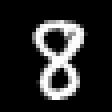

In [142]:

i = rand(1:num_imgs_test)
i

predict(i) = argmax(model(xtest[:,i]))-1

digit = predict(i)
actual =argmax(ytest[:,i])-1
println("pred = $digit, actual = $actual")

colorview(Gray, test_x[:,:,i]')

In [143]:
# size(ytest)

In [144]:
using TensorBoardLogger, Logging

In [145]:
logger = TBLogger("content/logs", tb_overwrite)

LoadError: IOError: unlink("content/logs\\events.out.tfevents.1.647121539842e9.DESKTOP-7DC3UA9"): resource busy or locked (EBUSY)

In [154]:
with_logger(logger) do 
   images = TBImage(train_x[:,:,1:10],WHN)
    @info "mnist/samples" pics = images log_step_increment = 0
end

From here
https://github.com/JuliaLogging/TensorBoardLogger.jl/blob/master/examples/Flux.jl

In [155]:
#function to get dictionary of model parameters
function fill_param_dict!(dict, m, prefix)
    if m isa Chain
        for (i, layer) in enumerate(m.layers)
            fill_param_dict!(dict, layer, prefix*"layer_"*string(i)*"/"*string(layer)*"/")
        end
    else
        for fieldname in fieldnames(typeof(m))
            val = getfield(m, fieldname)
            if val isa AbstractArray
                val = vec(val)
            end
            dict[prefix*string(fieldname)] = val
        end
    end
end

fill_param_dict! (generic function with 1 method)

In [156]:
#function to log information after every epoch
function TBCallback()
  param_dict = Dict{String, Any}()
  fill_param_dict!(param_dict, model, "")
  with_logger(logger) do
    @info "model" params=param_dict log_step_increment=0
    @info "train" loss=loss(xtrain, ytrain) acc=accuracy(xtrain, ytrain) log_step_increment=0
    @info "test" loss=loss(xtest, ytest) acc=accuracy(xtest, ytest)
  end
end

TBCallback (generic function with 1 method)

In [149]:
? Flux.ADAM

```
ADAM(η = 0.001, β::Tuple = (0.9, 0.999), ϵ = 1.0e-8)
```

[ADAM](https://arxiv.org/abs/1412.6980) optimiser.

# Parameters

  * Learning rate (`η`): Amount by which gradients are discounted before updating                      the weights.
  * Decay of momentums (`β::Tuple`): Exponential decay for the first (β1) and the                                  second (β2) momentum estimate.

# Examples

```julia
opt = ADAM()

opt = ADAM(0.001, (0.9, 0.8))
```


In [150]:
# function SGD_Mnist(xtrain, ytrain, opt, epochs_max = 100_000)
grad_opt =  Flux.ADAM(0.23)

vector_length, num_imgs = size(xtrain)

# Make a new model so that we are staring from scratch
model = make_model()
loss(x,y) = Flux.Losses.mse(model(x), y)
accuracy(x,y) = Statistics.mean(Flux.onecold(model(x)) .==Flux.onecold(y)) 
parameters = Flux.params(model);
#     opt = 





In [151]:
epochs_max=100
say_status_frequency =  Integer(round(epochs_max/10))
num_imgs_per_epoch = Integer(round(num_imgs/1000))  # get 0.1% of the data per epoch

m = model
l = loss
acc = accuracy
p = parameters
d  = data;

function say_status_V2( state)
    println("$state loss = $(loss(xtrain, ytrain)) and accuracy = $(accuracy(xtrain, ytrain))")
end

say_status_V2 (generic function with 2 methods)

In [160]:
epochs_max=200
# it does seem much slower!!!!!

1000

In [ ]:

# loop over `epochs_max` to train the model. 
println("Starting")
for epoch in 1:epochs_max

    # randomly select some data. 
    i = rand(1:num_imgs,num_imgs_per_epoch) 
   data = [(xtrain[:,i], ytrain[:,i])]    

    # Do the training, i.e. updat the weights
    Flux.train!(l, p, d, opt, cb = Flux.throttle(TBCallback, 5))

    if epoch % say_status_frequency ==0
        say_status_V2(  "Training at epoch  = $epoch, xtrain size $(size(xtrain))")
#          println("$state loss = $(l(xtrain, ytrain)) and accuracy = $(acc(xtrain, ytrain))")
    end
end


Starting
Training at epoch  = 10, xtrain size (784, 60000) loss = 0.091326654 and accuracy = 0.11251666666666667
Training at epoch  = 20, xtrain size (784, 60000) loss = 0.09133341 and accuracy = 0.11251666666666667
Training at epoch  = 30, xtrain size (784, 60000) loss = 0.09134228 and accuracy = 0.11253333333333333
Training at epoch  = 40, xtrain size (784, 60000) loss = 0.09135264 and accuracy = 0.11253333333333333
Training at epoch  = 50, xtrain size (784, 60000) loss = 0.09136403 and accuracy = 0.11253333333333333
Training at epoch  = 60, xtrain size (784, 60000) loss = 0.09137605 and accuracy = 0.11255
Training at epoch  = 70, xtrain size (784, 60000) loss = 0.091388434 and accuracy = 0.11255
Training at epoch  = 80, xtrain size (784, 60000) loss = 0.09140095 and accuracy = 0.11255
Training at epoch  = 90, xtrain size (784, 60000) loss = 0.09141344 and accuracy = 0.11256666666666666
Training at epoch  = 100, xtrain size (784, 60000) loss = 0.091425754 and accuracy = 0.11261666666

LoadError: InterruptException:

In [162]:
epoch = "finished"
 say_status_V2(  "Training at epoch  = $epoch, xtrain size $(size(xtrain))")


Training at epoch  = finished, xtrain size (784, 60000) loss = 0.091536745 and accuracy = 0.18028333333333332


LoadError: InterruptException: